In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
from scipy.integrate import cumtrapz

In [5]:
# csvファイルの読み込み
csv_file_path_walk = "data/new.csv"
raw_data_walk = pd.read_csv(csv_file_path_walk)
print(raw_data_walk)

              t         x         y         z
0      0.000000 -9.251195 -0.095768  3.204639
1      0.019849 -9.265560 -0.111330  3.252523
2      0.035718 -9.251195 -0.114922  3.296816
3      0.048671 -9.279925 -0.150835  3.305195
4      0.060207 -9.293094 -0.189142  3.293224
...         ...       ...       ...       ...
2323  23.261522 -7.334637  1.144428  5.838261
2324  23.271286 -6.843825  0.883460  6.150704
2325  23.281473 -6.777985  0.878672  6.230910
2326  23.291304 -6.780379  0.883460  6.354211
2327  23.301444 -6.831854  0.866701  6.449979

[2328 rows x 4 columns]


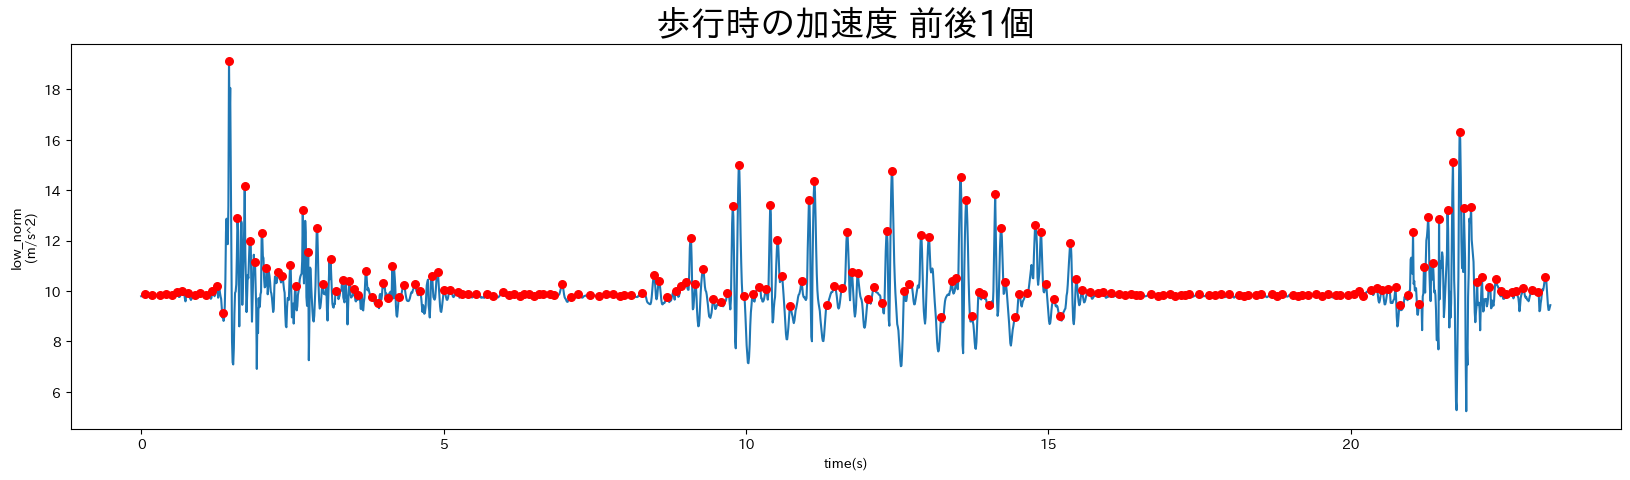

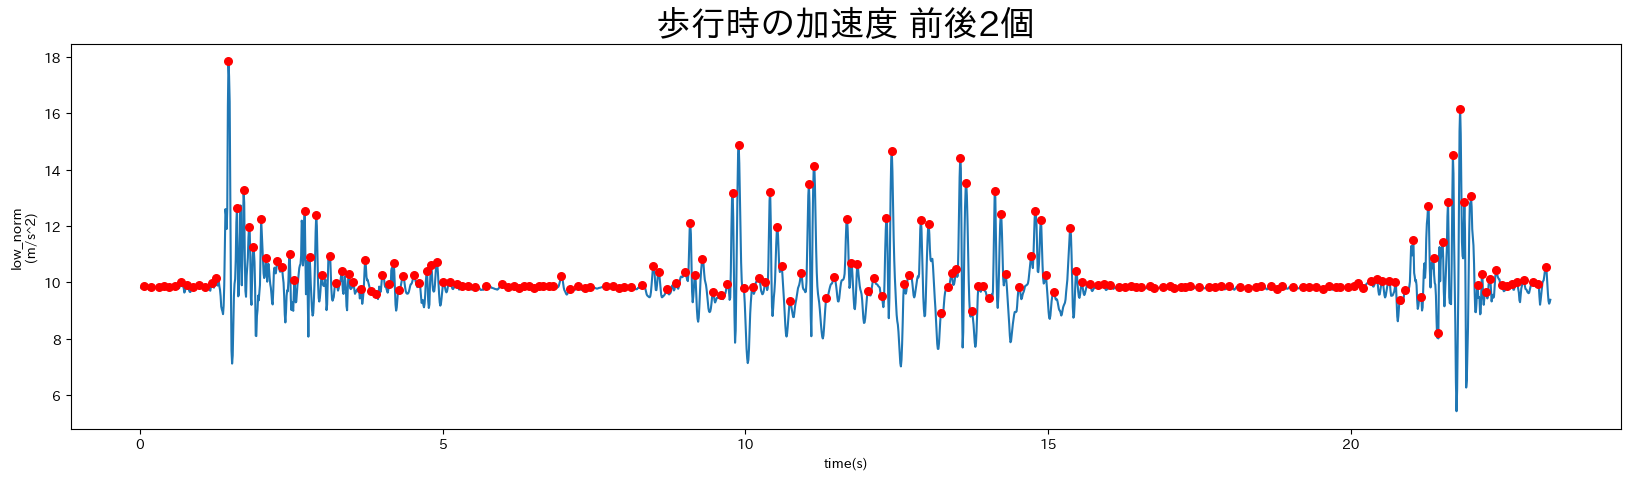

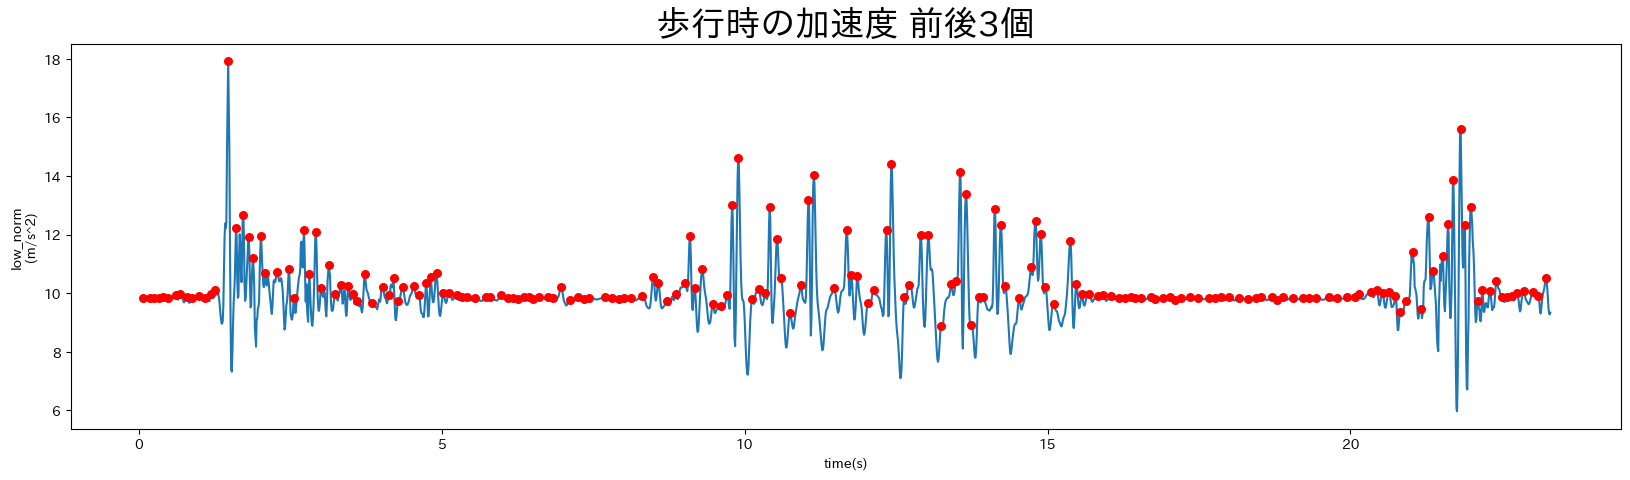

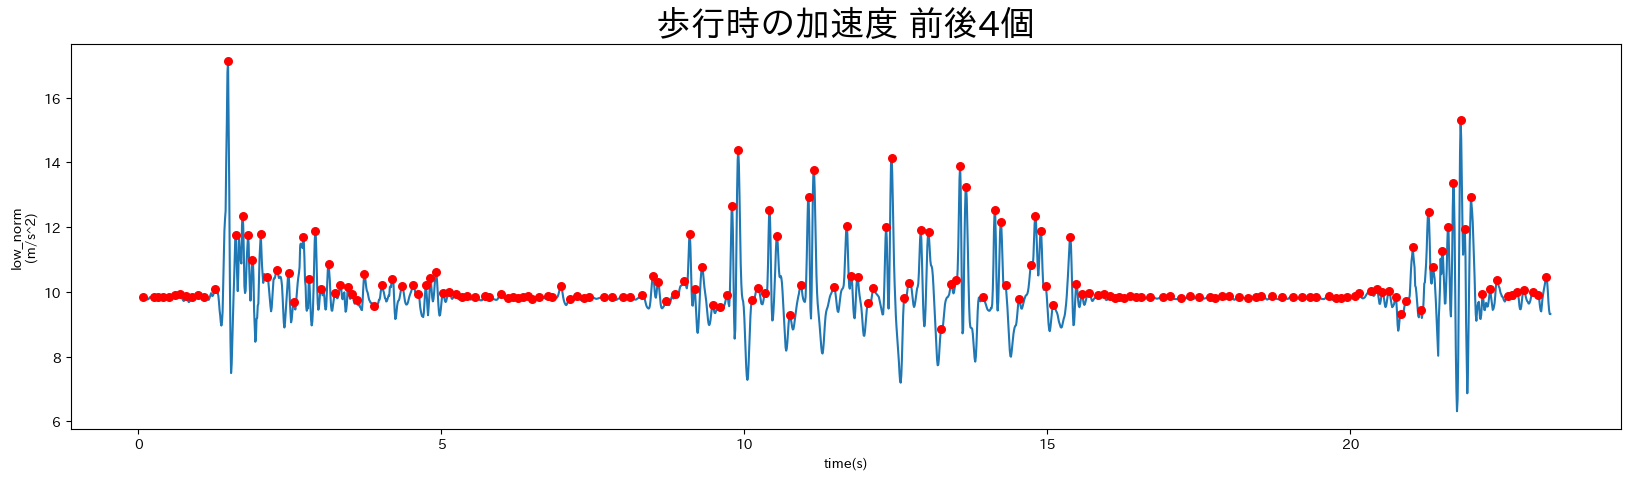

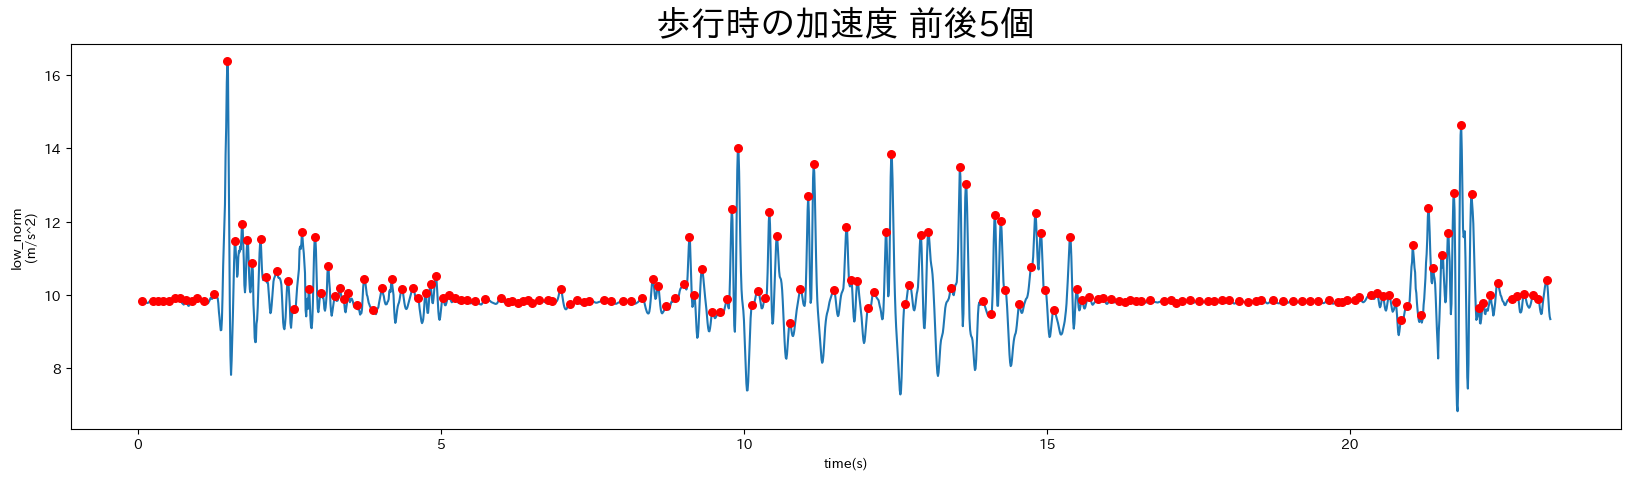

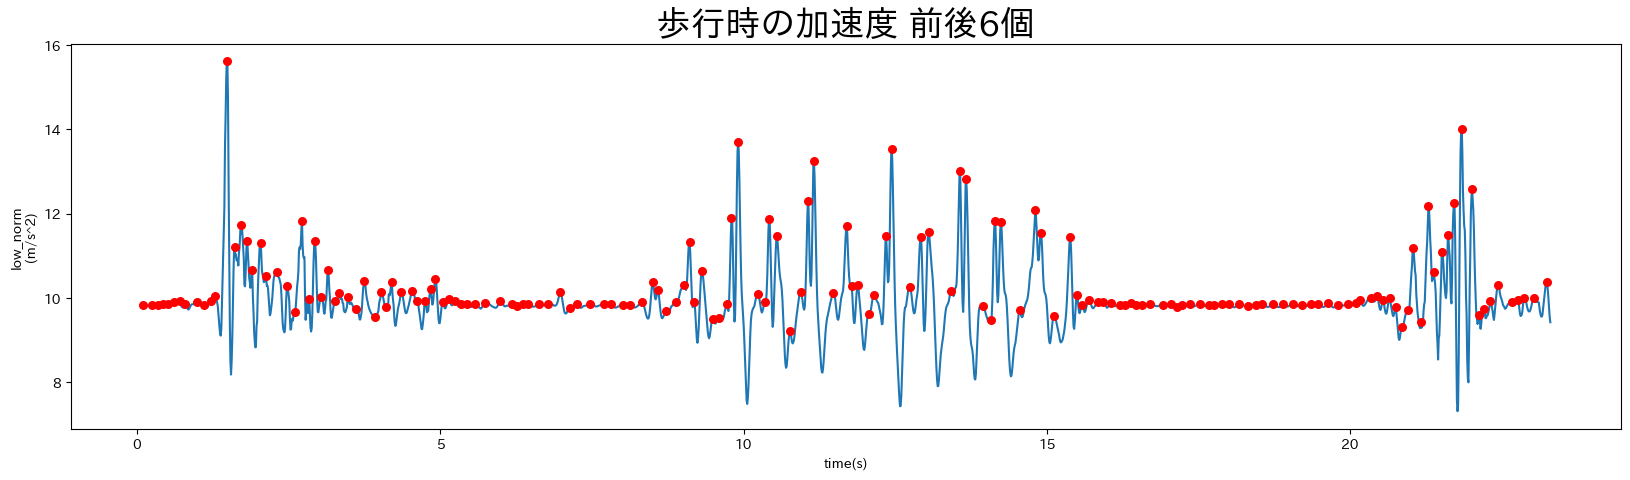

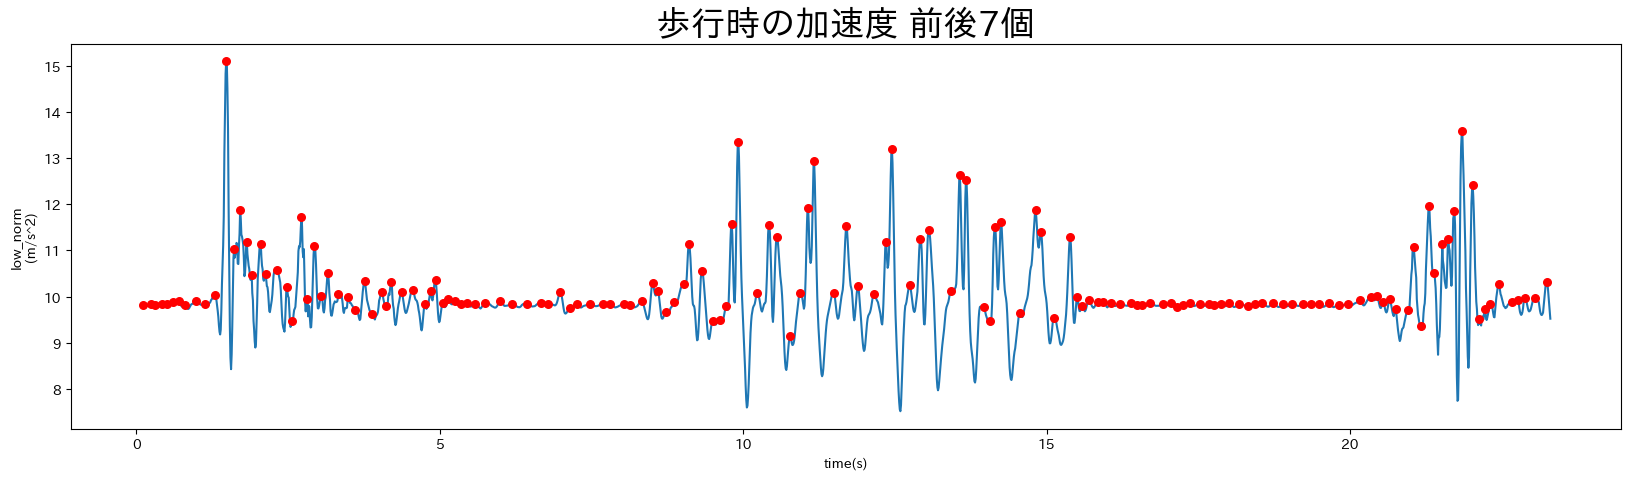

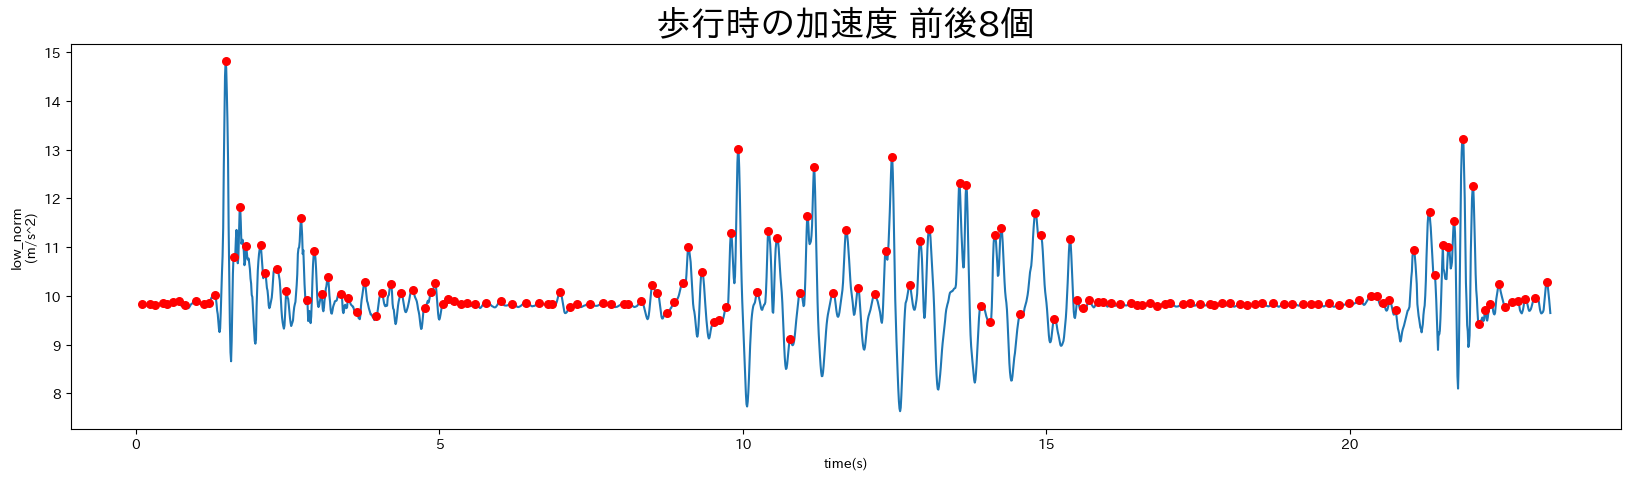

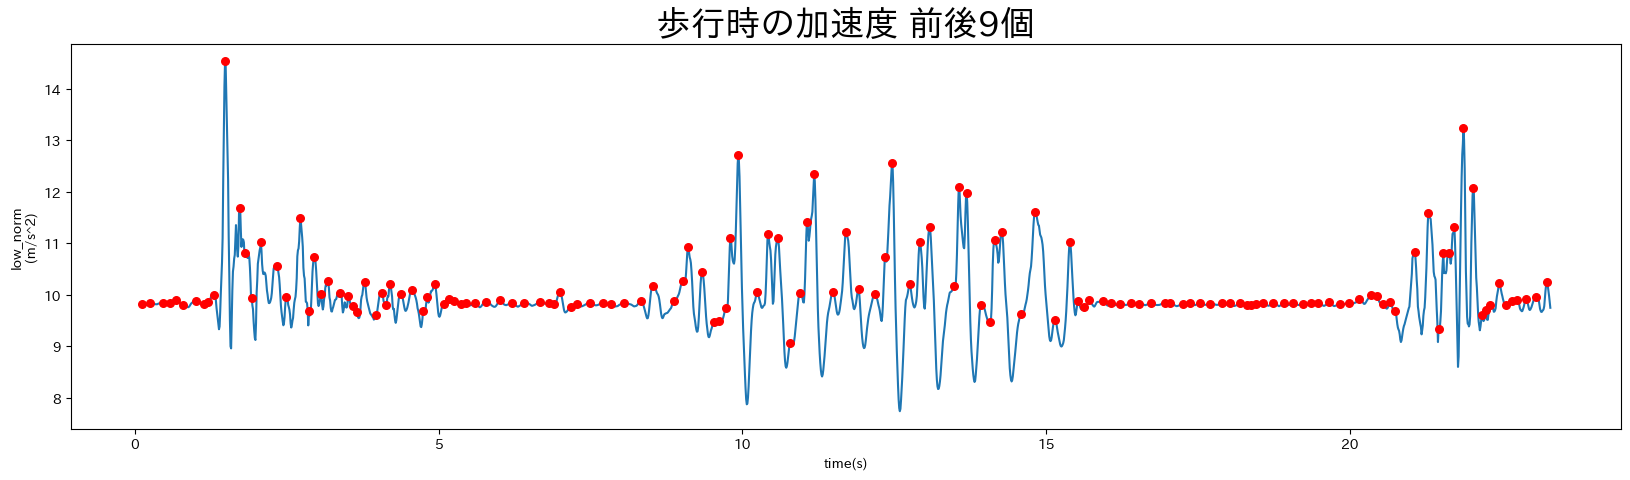

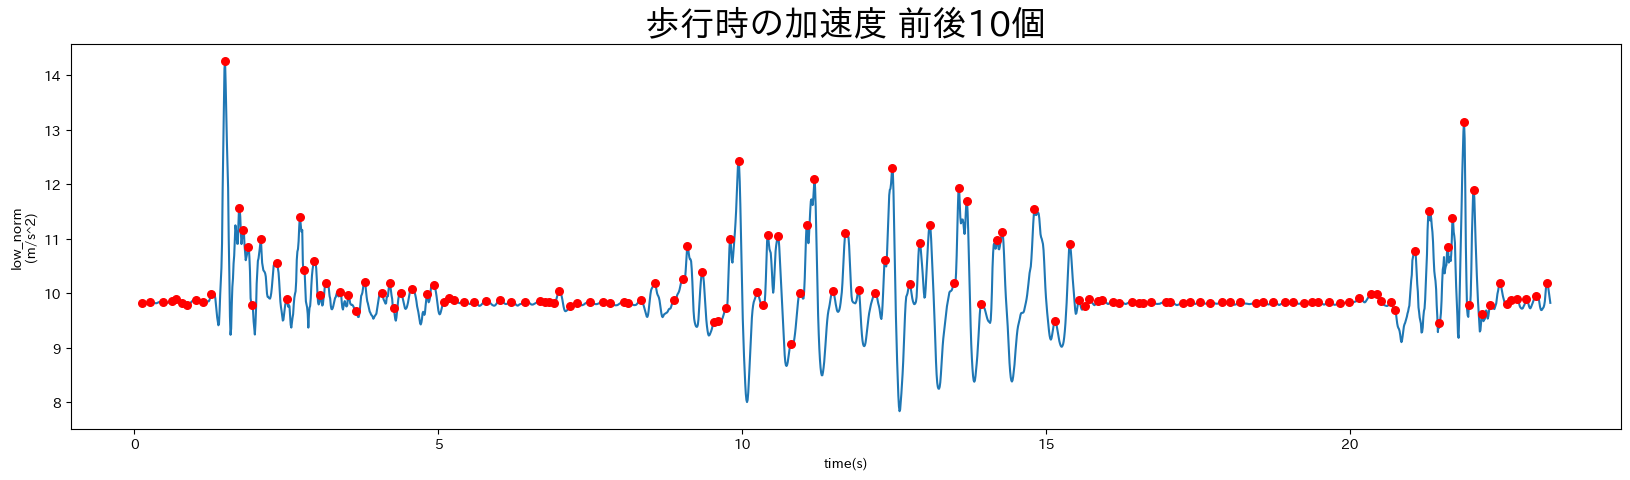

In [9]:
for i in range(10):
    df = pd.read_csv(csv_file_path_walk)
    # normを計算
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    # 移動平均を計算
    df['low_norm'] = df['norm'].rolling(window=i+1).mean()
    # df['low_norm'] = df['low_norm'].rolling(window=10).mean()
    fig = plt.figure(figsize=(20, 5))
    plt.title(f'歩行時の加速度 前後{i+1}個', fontsize=25)
    plt.plot(df['t'], df['low_norm'], zorder=1)
    plt.xlabel('time(s)')
    plt.ylabel('low_norm\n(m/s^2)')
    # 赤点を描画
    peek, _ = signal.find_peaks(df['low_norm'],distance=7, height=1.5)
    plt.scatter(df['t'][peek], df['low_norm']
                [peek], s=30, color='red', zorder=2)
    
    plt.show()    

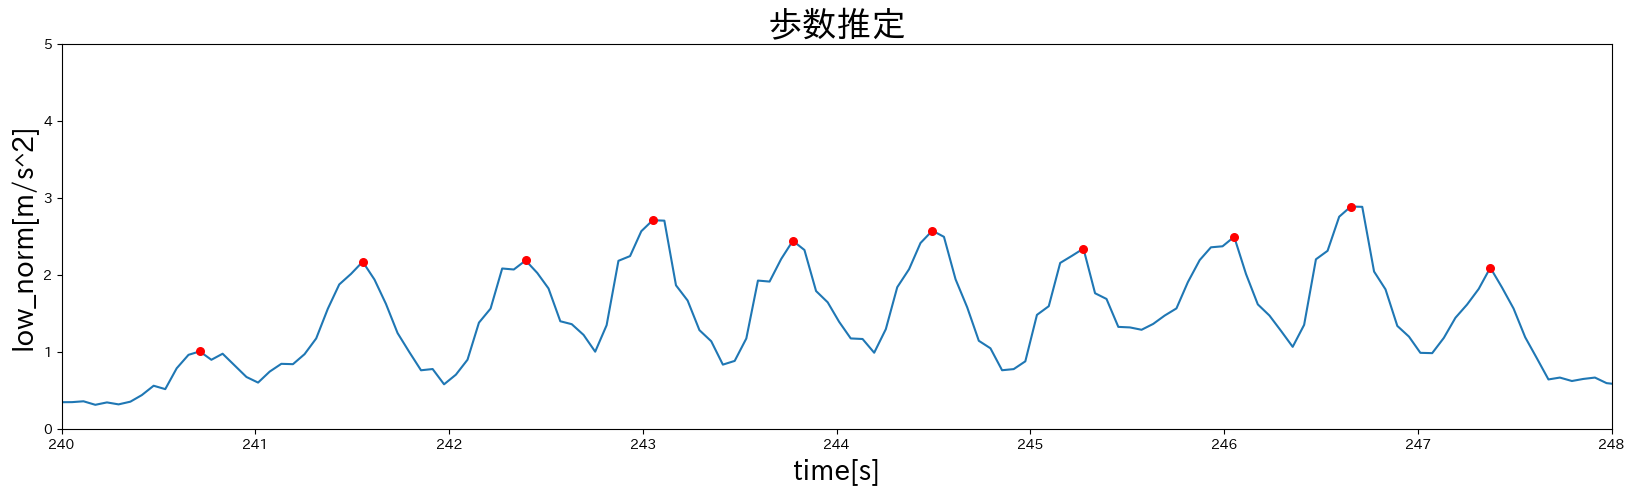

In [4]:
df = pd.read_csv(csv_file_path_walk)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# 移動平均を計算
df['low_norm'] = df['norm'].rolling(window=5).mean()
# df['low_norm'] = df['low_norm'].rolling(window=10).mean()
fig = plt.figure(figsize=(20, 5))
plt.title('歩数推定', fontsize=25)
plt.plot(df['time']/1000, df['low_norm'], zorder=1)
plt.xlabel('time[s]', fontsize=20)
plt.ylabel('low_norm[m/s^2]', fontsize=20)
# 赤点を描画
peek, _ = signal.find_peaks(df['low_norm'],distance=5, height=1)
plt.scatter(df['time'][peek]/1000, df['low_norm']
            [peek], s=30, color='red', zorder=2)
plt.ylim(0, 5)
plt.xlim(240, 248)
plt.show()    